    IMPORTING DATASET

In [79]:
import pandas as pd
df = pd.read_csv('AZ_cleaned.csv') #, index_col = 0) this line removes the index column but messes with other columns, see change log
df #print(df.head(10)) for the time being, we can have it just as 'df' but I don't think that works in normal jupyter notebook?

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,16,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,contraband_found,stop_outcome,is_arrested,officer_id,stop_duration,road_number,milepost,consent_search,vehicle_type,ethnicity
0,AZ-2009-001,AZ,2009-01-06,NaN,NaN,Maricopa County,4013.0,I10 165 NA,NaN,M,...,False,Warning,False,5283,NaN,I10,165.0,False,12PU 2007,H
1,AZ-2009-002,AZ,2009-01-18,NaN,NaN,Maricopa County,4013.0,US60 185 NA,NaN,M,...,False,Warning,False,5283,NaN,US60,185.0,False,4DSD 2004,W
2,AZ-2009-003,AZ,2009-01-20,NaN,NaN,Maricopa County,4013.0,SR202 16 NA,NaN,M,...,False,Warning,False,5283,NaN,SR202,16.0,False,4DSD 2001,H
3,AZ-2009-004,AZ,2009-01-24,NaN,NaN,Maricopa County,4013.0,US60 172.4 NA,NaN,F,...,False,Citation,False,5283,NaN,US60,172.4,False,4DSD 2003,H
4,AZ-2009-005,AZ,2009-01-25,NaN,NaN,Maricopa County,4013.0,US60 181 NA,NaN,F,...,False,Warning,False,5283,NaN,US60,181.0,False,4DSD 2001,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251987,AZ-2015-450515,AZ,2015-11-30,23:48,7.0,Maricopa County,4013.0,I17 202 NA,NaN,M,...,False,Warning,False,7460,0-10,I17,202.0,False,CP 1994,H
2251988,AZ-2015-450516,AZ,2015-11-30,23:50,3.0,Coconino County,4005.0,US89 434 NA,NaN,F,...,False,Citation,False,7829,NaN,US89,434.0,False,12PU 2005,N
2251989,AZ-2015-450517,AZ,2015-11-30,23:53,7.0,Maricopa County,4013.0,I17 202.9 NA,NaN,M,...,False,Warning,False,7460,NaN,I17,202.9,False,4DSD 2015,B
2251990,AZ-2015-450518,AZ,2015-11-30,23:56,7.0,Maricopa County,4013.0,NA NA 7THAVE/JEFFERSON,NaN,M,...,False,Citation,False,7833,NaN,NaN,NaN,False,34PU 2006,H


    IDENTIFYING COLUMN NAMES

In [80]:
column_names = []
for col in df:
    column_names.append(col)

print(column_names)

['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name', 'county_fips', 'fine_grained_location', 'police_department', 'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race', 'violation_raw', 'violation', 'search_conducted', 'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome', 'is_arrested', 'officer_id', 'stop_duration', 'road_number', 'milepost', 'consent_search', 'vehicle_type', 'ethnicity']


    REMOVING ALL ROWS WHICH DO NOT CONTAIN VALUES IN THE 'STOP OUTCOME' OR 'DRIVER RACE' COLUMNS

In [81]:
#removing any columns missing values, or having NaN in the 'stop_outcome' column
df.dropna(how = 'any', subset = ['stop_outcome', 'driver_race'], axis = 0, inplace = True)
df #removes ca. 200 rows, not much, but not doing this will result in problems in the future.

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,contraband_found,stop_outcome,is_arrested,officer_id,stop_duration,road_number,milepost,consent_search,vehicle_type,ethnicity
0,AZ-2009-001,AZ,2009-01-06,NaN,NaN,Maricopa County,4013.0,I10 165 NA,NaN,M,...,False,Warning,False,5283,NaN,I10,165.0,False,12PU 2007,H
1,AZ-2009-002,AZ,2009-01-18,NaN,NaN,Maricopa County,4013.0,US60 185 NA,NaN,M,...,False,Warning,False,5283,NaN,US60,185.0,False,4DSD 2004,W
2,AZ-2009-003,AZ,2009-01-20,NaN,NaN,Maricopa County,4013.0,SR202 16 NA,NaN,M,...,False,Warning,False,5283,NaN,SR202,16.0,False,4DSD 2001,H
3,AZ-2009-004,AZ,2009-01-24,NaN,NaN,Maricopa County,4013.0,US60 172.4 NA,NaN,F,...,False,Citation,False,5283,NaN,US60,172.4,False,4DSD 2003,H
4,AZ-2009-005,AZ,2009-01-25,NaN,NaN,Maricopa County,4013.0,US60 181 NA,NaN,F,...,False,Warning,False,5283,NaN,US60,181.0,False,4DSD 2001,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251987,AZ-2015-450515,AZ,2015-11-30,23:48,7.0,Maricopa County,4013.0,I17 202 NA,NaN,M,...,False,Warning,False,7460,0-10,I17,202.0,False,CP 1994,H
2251988,AZ-2015-450516,AZ,2015-11-30,23:50,3.0,Coconino County,4005.0,US89 434 NA,NaN,F,...,False,Citation,False,7829,NaN,US89,434.0,False,12PU 2005,N
2251989,AZ-2015-450517,AZ,2015-11-30,23:53,7.0,Maricopa County,4013.0,I17 202.9 NA,NaN,M,...,False,Warning,False,7460,NaN,I17,202.9,False,4DSD 2015,B
2251990,AZ-2015-450518,AZ,2015-11-30,23:56,7.0,Maricopa County,4013.0,NA NA 7THAVE/JEFFERSON,NaN,M,...,False,Citation,False,7833,NaN,NaN,NaN,False,34PU 2006,H


In [82]:
#df = df.rename_axis('id').rename_axis('id', axis='columns') 
""" if having used the index_col = 0 function when importing, this sets the otherwise blank name 
of the 'id' column to be 'id' however the system does not actually read it's name as 'id'. 
No solution found thus far. """
#df

" if having used the index_col = 0 function when importing, this sets the otherwise blank name \nof the 'id' column to be 'id' however the system does not actually read it's name as 'id'. \nNo solution found thus far. "

    REMOVING ALL ROWS WHICH EITHER DO NOT CONTAIN ANY VALUES AT ALL, OR ARE THE RAW VERSIONS OF OTHER COLUMNS

In [83]:
def remove_redundancies(df_name):
    redundant_columns = ['id','state', 'stop_date', 'location_raw', 'county_name', 'county_fips', 'fine_grained_location', 
    'driver_age_raw', 'driver_race_raw', 'violation_raw', 'search_type_raw', 'officer_id', 'stop_duration', 'road_number',
    'milepost','vehicle_type', 'police_department', 'stop_time', 'driver_age'] #note: stop time is temporarily removed because the current code doesnt want to read it properly
    df_name = df.drop(columns = redundant_columns, axis = 1, inplace = True)   #note 2: driver_age can be included if values are present in your dataset
    return df_name

remove_redundancies(df)


In [84]:
df

,driver_gender,driver_race,violation,search_conducted,search_type,contraband_found,stop_outcome,is_arrested,consent_search,ethnicity
0,M,Hispanic,NaN,False,NaN,False,Warning,False,False,H
1,M,White,NaN,False,NaN,False,Warning,False,False,W
2,M,Hispanic,NaN,False,NaN,False,Warning,False,False,H
3,F,Hispanic,License,False,NaN,False,Citation,False,False,H
4,F,White,NaN,False,NaN,False,Warning,False,False,W
...,...,...,...,...,...,...,...,...,...,...
2251987,M,Hispanic,NaN,False,NaN,False,Warning,False,False,H
2251988,F,Other,NaN,False,NaN,False,Citation,False,False,N
2251989,M,Black,NaN,False,NaN,False,Warning,False,False,B
2251990,M,Hispanic,NaN,False,NaN,False,Citation,False,False,H


In [85]:
df.isnull().sum()

driver_gender             0
driver_race               0
violation           1389783
search_conducted          0
search_type         2239205
contraband_found          0
stop_outcome              0
is_arrested               0
consent_search        93188
ethnicity                 0
dtype: int64

    BECAUSE WE SUSPECT A CORRELATION BEWTEEN DRIVER RACE, AND STOP OUTCOME, PLOTTING THE DRIVER RACE DISTRIBUTION TO SEE IF IT IS SKEWED TOWARDS CERTAIN GROUP

In [86]:
print(df.value_counts(df['driver_race']))

driver_race
White       1346725
Hispanic     576512
Other        148054
Black        128578
Asian         51913
dtype: int64


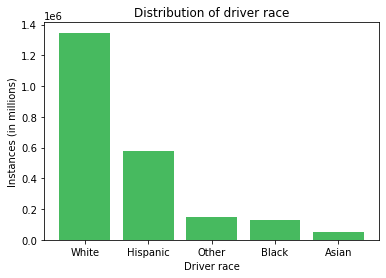

In [87]:
import numpy as np
import matplotlib.pyplot as plt
 
height = df.value_counts(df['driver_race']) #counting instances of each 'class' of driver race
bars = ('White','Hispanic','Other','Black','Asian') #labelling the abrs
x_pos = np.arange(len(bars))
 
plt.bar(x_pos, height, color = (0.2,0.7,0.3,0.9)) #plotting and selecting colour

plt.title('Distribution of driver race')
plt.xlabel('Driver race')
plt.ylabel('Instances (in millions)')
 
plt.xticks(x_pos, bars)  #Create names on the x axis
 
plt.show()

In [88]:
""" from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings

X = df.drop(['stop_outcome'], axis = 1)
y = df['stop_outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Xd = pd.get_dummies(X, columns = ['driver_gender', 'driver_race','violation', 'search_conducted', 'search_type', 
                                  'contraband_found', 'is_arrested', 'consent_search', 'ethnicity'])
print(Xd.shape[1] - X.shape[1], 'columns added') """

" from sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nimport warnings\n\nX = df.drop(['stop_outcome'], axis = 1)\ny = df['stop_outcome']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)\n\nXd = pd.get_dummies(X, columns = ['driver_gender', 'driver_race','violation', 'search_conducted', 'search_type', \n                                  'contraband_found', 'is_arrested', 'consent_search', 'ethnicity'])\nprint(Xd.shape[1] - X.shape[1], 'columns added') "

    CREATING TESTING DATAFRAME USING FIRST 100000 VALUES TO DECREASE PROCESSING TIME WHILE TESTING CODE AND PARAMETERS

In [89]:
df_testing = df.head(100000) #creating copy of dataframe that contains the first 100000 values for testing of code

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings

X = df_testing.drop(['stop_outcome'], axis = 1) 
y = df_testing['stop_outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Xd = pd.get_dummies(X, columns = ['driver_gender', 'driver_race','violation', 'search_conducted', 'search_type', 
                                  'contraband_found', 'is_arrested', 'consent_search', 'ethnicity']) #creating dummy values for all columns containing non-numerical values
print(Xd.shape[1] - X.shape[1], 'columns added')

263 columns added


In [90]:
Xd.dropna(axis = 0, inplace = True) #removing all rows which do not contain any values
Xd

,driver_gender_F,driver_gender_M,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,violation_DUI,"violation_DUI,Equipment","violation_DUI,Equipment,License",...,is_arrested_True,consent_search_False,consent_search_True,ethnicity_A,ethnicity_B,ethnicity_H,ethnicity_M,ethnicity_N,ethnicity_W,ethnicity_X
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100025,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
100026,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
100027,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
100028,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


    HYPERPARAMETER TUNING (TESTING ALL COMBINATIONS OF DIFFERENT PARAMETER VALUES, TO SEE WHAT GIVES THE BEST TRAIN AND TEST RESULTS)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn import model_selection, metrics
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline  

rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
gbm_model = GradientBoostingClassifier()

def rforest_tuning():
    Trees = [1, 10, 25, 50, 100, 150] #number of trees considered in random forest
    maxFeatures = [1, 5, 10, 15] #number of features considered at each split
    maxDepth = [1, 5, 10, 25, 50, 100] #max number of levels in a tree
    minSamplesSplit = [1.0, 2, 3, 4] #minimum number of samples for a node to split
    minSamplesLeaf = [1, 2, 3] #minimum number of samples required at each leaf node

    parameter_grid = {'n_estimators' : Trees,
                    'max_features' : maxFeatures,
                    'max_depth' : maxDepth,
                    'min_samples_split' : minSamplesSplit,
                    'min_samples_leaf' : minSamplesLeaf}
    
    rf_grid = GridSearchCV(estimator = rf_model, param_grid = parameter_grid, cv = 3, verbose = 2, n_jobs = 4) 
    rf_grid.fit(X_train, y_train)

    print(rf_grid.best_params_)
    print (f'Train Accuracy : {rf_grid.score(X_train,y_train):.3f}')
    print (f'Test Accuracy : {rf_grid.score(X_test,y_test):.3f}')

    # identifying and plotting feature importance
    importance = rf_model.feature_importances_
    for i,j in enumerate(importance):
        print(f'Feature: {i}, Score: {j}%.5f')

    plt.bar([x for x in range(len(importance))], importance)
    plt.show()


def knn_tuning():
    parameter_grid = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13, 15],
                      'weights' : ['uniform', 'distance'],
                      'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
    knn_grid = GridSearchCV(estimator = knn_model, param_grid = parameter_grid, cv = 3, verbose = 2, n_jobs = -1)
    knn_grid.fit(X_train, y_train)

    print(knn_grid.best_params_)
    print (f'Train Accuracy : {knn_grid.score(X_train,y_train):.3f}')
    print (f'Test Accuracy : {knn_grid.score(X_test,y_test):.3f}')


def GBM_tuning():
    parameter_grid = {'min_samples_split': range(200, 1001, 200),
                      'min_samples_leaf' : range(30, 71, 10),
                      'max_depth' : range(5, 16, 2),
                      'max_features' : ['sqrt'],
                      'subsample' : [0.8]}
    GBM_grid = GridSearchCV(estimator = gbm_model, param_grid = parameter_grid, cv = 3, verbose = 2, n_jobs = 4)
    GBM_grid.fit(X_train, y_train)

    print(GBM_grid.best_params_)
    print (f'Train Accuracy : {GBM_grid.score(X_train,y_train):.3f}')
    print (f'Test Accuracy : {GBM_grid.score(X_test,y_test):.3f}')

Feature: 0, Score: 0.00284
Feature: 1, Score: 0.00261
Feature: 2, Score: 0.00013
Feature: 3, Score: 0.00024
Feature: 4, Score: 0.00147
Feature: 5, Score: 0.00024
Feature: 6, Score: 0.00212
Feature: 7, Score: 0.00268
Feature: 8, Score: 0.00003
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00013
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00005
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00002
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00003
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00001
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00009
Feature: 30, Score: 0.00001
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00004
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

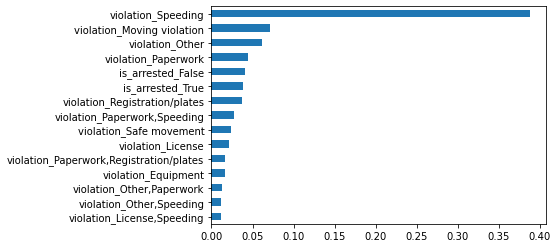

In [92]:
def feat_importance(model):
    Xd_train, Xd_test, y_train, y_test = train_test_split(Xd, y, random_state = 0)

    model.fit(Xd_train, y_train)
    importance = model.feature_importances_
    for i,j in enumerate(importance):
        print(f'Feature: {i}, Score: {j:.5f}')

    feat_importances = pd.Series(model.feature_importances_, index = Xd.columns)
    feat_importances.nlargest(15).plot(kind = 'barh').invert_yaxis()

feat_importance(rf_model)

violation_Speeding                         0.380626
violation_Moving violation                 0.074055
violation_Other                            0.064155
violation_Paperwork                        0.046488
is_arrested_False                          0.040129
is_arrested_True                           0.037294
violation_Registration/plates              0.036538
violation_Paperwork,Speeding               0.029208
violation_Safe movement                    0.025502
violation_License                          0.020932
violation_Equipment                        0.015769
violation_Paperwork,Registration/plates    0.015503
violation_Other,Speeding                   0.012780
violation_Other,Paperwork                  0.011927
violation_License,Speeding                 0.011572
search_conducted_False                     0.011561
violation_Stop sign/light                  0.010285
consent_search_False                       0.008749
violation_Moving violation,Paperwork       0.007828
search_condu

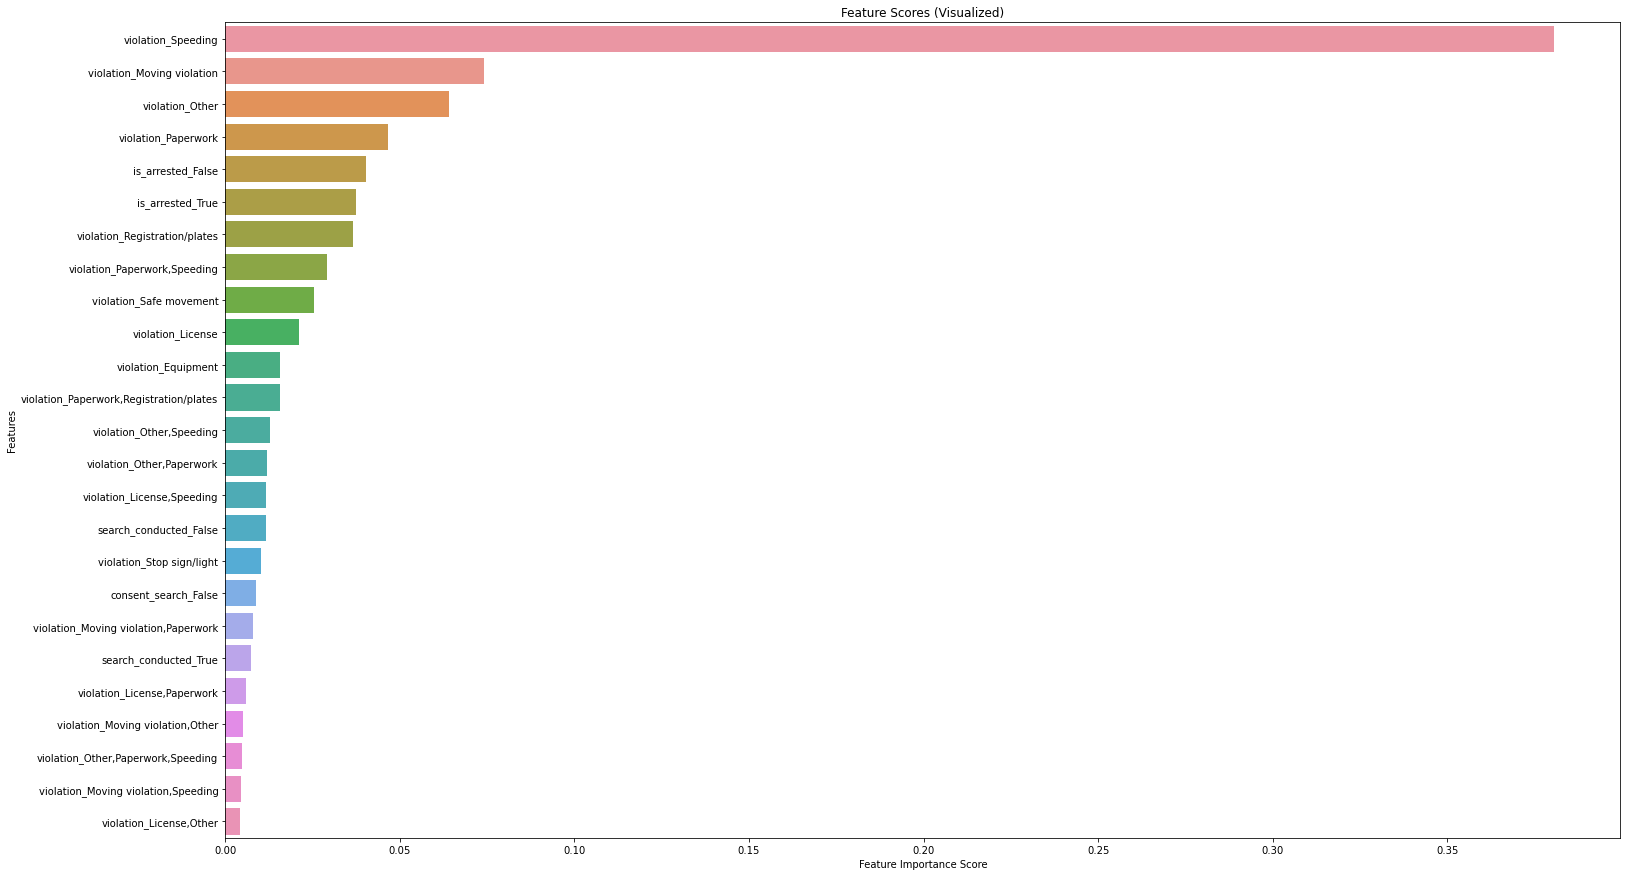

In [93]:
def feature_importances():
    Xd_train, Xd_test, y_train, y_test = train_test_split(Xd, y, random_state = 0)
    rfc_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
    rfc_model.fit(Xd, y)
    feature_scores = pd.Series(rfc_model.feature_importances_, index = Xd_train.columns).sort_values(ascending = False).nlargest(25) #nlargest can be removed to plot all features
    print(feature_scores)

    def visualize_importance():
        f, ax = plt.subplots(figsize = (25,15))
        ax = sns.barplot(x = feature_scores, y = feature_scores.index, data = df_testing)
        ax.set_title('Feature Scores (Visualized)')
        ax.set_yticklabels(feature_scores.index)
        ax.set_xlabel('Feature Importance Score')
        ax.set_ylabel('Features')

        plt.show

    visualize_importance()

feature_importances()


In [96]:
plt.figure(figsize = (12,10))
sns.heatmap(Xd, annot = True, cmap = plt.cm.Blues)
plt.show()

In [ ]:
#GBM_tuning()

In [ ]:
#rforest_tuning()

In [ ]:
#rf_grid = GridSearchCV(estimator = rf_model, param_grid = parameter_grid, cv = 3, verbose = 2, n_jobs = 4) 
#rf_grid.fit(X_train, y_train) #the 'cv' value is the class validation score, by increasing it, it evalues the model n amount of times, can
                              #improve accuracy, however it does make it take longer to run. With a cv of 10, the accuracy of test is 0.851.

In [ ]:
rf_grid.best_params_

NameError: name 'rf_grid' is not defined

In [ ]:
print(rf_grid.best_params_)
print (f'Train Accuracy : {rf_grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy : {rf_grid.score(X_test,y_test):.3f}')

                                THE CODE BELOW IS THE FIRST VERSIONS OF BOTH THE PARAMETER OPTIMIZATION AND FEATURE IMPORTANCE GRAPHICS

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xd, y, random_state = 0)

rforest = RandomForestClassifier(max_depth = 50, random_state = 0) #possible parameters :max_depth, min_sample_split, max_leaf_nodes
                                                            #min_samples_leaf, n_estimators, max_sample (bootstrap sample), max_features

rforest.fit(X_train, y_train)
train_score = rforest.score(X_train, y_train)
test_score = rforest.score(X_test, y_test)

print('Train   Test')
print('{:.3f} {:7.3f}'.format(train_score, test_score)) #unsure if these results are correct, is there a way to make it faster?

In [ ]:
import matplotlib.pyplot as plt

def specific_parameters():
        user_inputs = []
        parameters = ['max_depth', 'min_sample_split', 'max_leaf_nodes', 'min_samples_leaf', 'n_estimators', 'max_sample', 'max_features']
        for item in parameters:
            user_input = input(f'Please select a value for the parameter {item}:')
            if user_input.type() != 'float':
                user_inputs.append('None')
            else:
                user_inputs.append(user_input)
        return user_inputs

def test_parameter():
    number = [1, 5, 10, 25, 50, 100]
    print('Parameter size   Train   Test')
    results_train = []
    results_test = []
    for i in number:
        model = KNeighborsClassifier(n_neighbors = i, algorithm = 'auto', weights = 'distance')#max_features = 10, min_samples_leaf = 1, min_samples_split= 3, n_estimators= 150, random_state = 0)
        model.fit(X_train, y_train)

        #TRAIN
        train_score = model.score(X_train, y_train)
        results_train.append(train_score)
        
        #TEST
        test_score = model.score(X_test, y_test)
        results_test.append(test_score)

        print('{:8d} {:13.3f} {:7.3f}'.format(i, train_score, test_score))

    x = number
    y = results_train
    plt.plot(x,y)
    y = results_test 
    plt.plot(x,y)

#test_parameter() #note --> random grid can be used to optimize finding the best feature values

In [ ]:
def modelfit(algorithm, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #fit the data to the algorithm
    algorithm.fit(dtrain[predictors], dtrain['Disbursed'])
    
    #predict training set
    dtrain_predictions = algorithm.predict(dtrain[predictors])
    dtrain_probabilities = algorithm.predict_proba(dtrain[predictors])[:,1]

    #perform cross validation
    if performCV:
        cv_score = model_selection.cross_val_score(algorithm, dtrain[predictors], dtrain['Disbursed'], cv = cv_folds, scoring = 'roc_auc')
    
    #model results
    print('\nModel Results')
    print('Accuracy : %4g' %metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print('AUC score (train): %f' %metrics.roc_auc_score(dtrain['Disbursed'], dtrain_probabilities))

    if performCV:
        print('CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g' % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    
    #feature importance
    if printFeatureImportance:
        feat_imp = pd.Series(algorithm.feature_importances_, predictors).sort_values(ascending = False)
        feat_imp.plot(kind = 'bar', title = 'Feature Importances')
        plt.ylabel('Feature Importance Score')
        
